# Install Tensorflow

In [ ]:
!pip install tensorflow
!pip install matplotlib

# Import important libs

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Mount Google Drive for datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Training and Testing

In [ ]:
#Assume 80:20
train_dir = '/content/drive/My Drive/Work/AI-CNN/data/train'
#Lily 02 to 70
#Orchid 02 to 53

val_dir = '/content/drive/My Drive/Work/AI-CNN/data/val'
#Lily 71 to 88
#Orchid 54 to 67

# CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Train
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 114 images belonging to 2 classes.
Found 31 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 59s 9s/step - accuracy: 0.5598 - loss: 1.8469 - val_accuracy: 0.4194 - val_loss: 0.7005
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.6921 - loss: 0.6509 - val_accuracy: 0.5806 - val_loss: 0.7256
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.6033 - loss: 0.6528 - val_accuracy: 0.6452 - val_loss: 0.6247
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.6790 - loss: 0.5668 - val_accuracy: 0.6129 - val_loss: 0.6131
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.7392 - loss: 0.5042 - val_accuracy: 0.6774 - val_loss: 0.6271
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.8841 - loss: 0.3934 - val_accuracy: 0.7419 - val_loss: 0.6131
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.9093 - loss: 0.2752 - val_accuracy: 0.7097 - val_loss: 0.5684
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.9075 - loss: 0.1988 - val_accuracy: 0.7097 - val_loss: 1.0534
Epoch 9/10
4/4 ━━━━

# Visualize

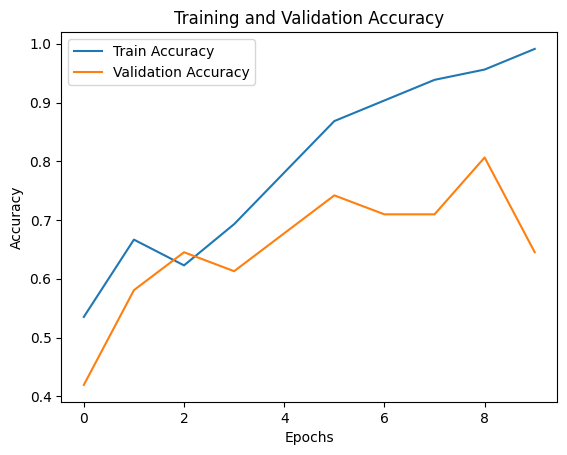

In [ ]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

## Retraining

In [ ]:
history = model.fit(train_generator, validation_data=val_generator, epochs=8)

Epoch 1/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 1.0000 - loss: 0.0337 - val_accuracy: 0.7742 - val_loss: 0.8237
Epoch 2/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 1.0000 - loss: 0.0262 - val_accuracy: 0.6452 - val_loss: 1.3746
Epoch 3/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 1.0000 - loss: 0.0068 - val_accuracy: 0.6129 - val_loss: 1.7808
Epoch 4/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.6452 - val_loss: 1.6507
Epoch 5/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - accuracy: 1.0000 - loss: 8.1203e-04 - val_accuracy: 0.6774 - val_loss: 1.4507
Epoch 6/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 1.0000 - loss: 6.3405e-04 - val_accuracy: 0.7419 - val_loss: 1.4513
Epoch 7/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 1.0000 - loss: 3.9003e-04 - val_accuracy: 0.6774 - val_loss: 1.5480
Epoch 8/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 1.0000 - loss: 2.6094e-04 - val_accuracy: 0.6774 - val_loss: 1.6465


# Visualize Again

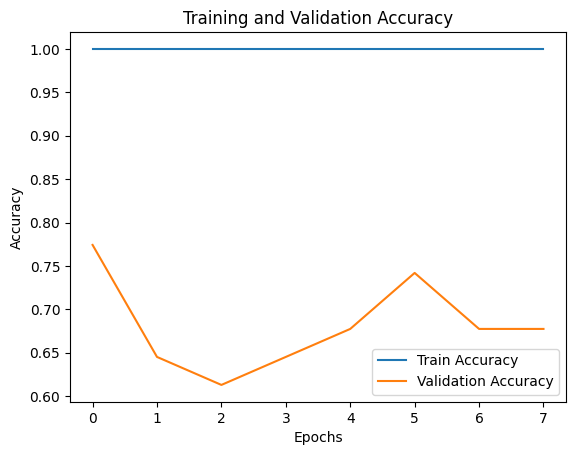

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Conclusion

Final Training Accuracy: 1.0000
Final Validation Accuracy: 0.6774
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

--- Model Evaluation Summary ---
Final Model Accuracy on Validation Set: 0.6129

Classification Report:
              precision    recall  f1-score   support

        Lily       0.64      0.78      0.70        18
      Orchid       0.56      0.38      0.45        13

    accuracy                           0.61        31
   macro avg       0.60      0.58      0.58        31
weighted avg       0.60      0.61      0.60        31



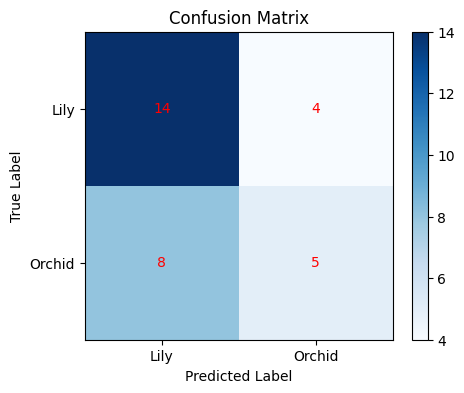

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Data From the history model trained (8 epochs)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

final_train_acc = train_acc[-1]  # Last epoch's training accuracy
final_val_acc = val_acc[-1]  # Last epoch's validation accuracy

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

# (On Validation Data)
y_true = val_generator.classes  # True labels from the validation set
y_pred = model.predict(val_generator)  # Predictions (probabilities)
y_pred = (y_pred > 0.5).astype(int).flatten()  # Convert probabilities to class labels (0 or 1)

avg_accuracy = accuracy_score(y_true, y_pred)
class_report = classification_report(y_true, y_pred, target_names=['Lily', 'Orchid'])

# Confusion matrix init
conf_matrix = confusion_matrix(y_true, y_pred)

print("\n--- Model Evaluation Summary ---")
print(f"Final Model Accuracy on Validation Set: {avg_accuracy:.4f}\n")
print("Classification Report:")
print(class_report)

# Show The Confusion Matrix
plt.figure(figsize=(5, 4))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks([0, 1], ['Lily', 'Orchid'])
plt.yticks([0, 1], ['Lily', 'Orchid'])

for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='red')

plt.show()

# Save Model

In [ ]:
model.save('/content/drive/My Drive/Work/AI-CNN/model/lily_orchid_classifier.h5')